In [1]:
import pandas as pd
import numpy as np
from data_storage import create_connection
import matplotlib.pyplot as plt

In [2]:
connection = create_connection("../database/crypto_billionairs.db")

In [66]:
sql = 'SELECT table_name'\
        ', annualized_return as annualized_return'\
        ', annualized_return / trades_count AS ann_return_per_trade'\
        ', win_rate AS win_rate'\
        ', sharpe_ratio_annualized as sharpe_ratio'\
        ', sortino_ratio_annualized as sortino_ratio'\
        ', maximum_drawdown as maximum_drawdown'\
        ', calmar_ratio_annualized as calmar_ratio'\
        ' FROM cryptocurrencies_risk_metrics_1m_abnormal_day_ml'\
        ' where table_name LIKE "%_threshold_ensemble_%" and timehorizon > 365'
       

df = pd.read_sql_query(f"{sql}", connection)
df.head()

,table_name,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
0,no_0_threshold_ensemble_long_ADA_1min_complete...,963.030848,4.098004,69.787234,905.974489,220.925991,0.048024,2.043340e+05
1,no_0_threshold_ensemble_long_BCH_1min_complete...,43.819237,0.136085,58.385093,2.534458,23.034539,0.120380,2.229374e+04
2,no_0_threshold_ensemble_long_BSV_1min_complete...,126.837743,0.631034,56.218905,50.711524,27.215053,0.317306,5.070132e+02
3,no_0_threshold_ensemble_long_BTC_1min_complete...,12.023859,0.015011,61.548065,108.658291,14.149094,0.055872,7.404259e+07
4,no_0_threshold_ensemble_long_BTG_1min_complete...,320.049811,0.914428,61.142857,161.391338,177.238739,0.179091,1.782126e+07


In [31]:
df["threshold"] = df["table_name"].str.split("_").str[1].astype(int)
df["type"] = df["table_name"].str.split("_").str[4]
df = df.drop(["table_name"], axis = 1)

In [36]:
df_plt = df.groupby(by=["type", "threshold"]).mean()

In [37]:
df_plt

annualized_return  ann_return_per_trade    win_rate  \
type  threshold                                                        
long  0               14806.487752            106.447131   62.375422   
      1               32669.179194            269.941734   66.816826   
      2               30666.684281            258.562439   67.468420   
      3               31269.861352            266.618121   68.086523   
      4               32084.714096            278.544001   68.822489   
...                            ...                   ...         ...   
short 45                 65.625838              3.715679   98.240616   
      46                 42.540133              3.086663   97.921378   
      47                 27.391063              2.903824   98.440617   
      48                 10.787971              2.038834   97.045455   
      49                  3.836137              1.698755  100.000000   

                 sharpe_ratio  sortino_ratio  maximum_drawdown  calmar_ratio  
type  threshold                                                               
long  0            941.737687     886.600857          0.115330  3.836004e+08  
      1           2748.839098    1868.356951          0.035728  6.088520e+11  
      2           2568.028653    1869.219538          0.038385  1.064255e+12  
      3           2627.026068    1924.758258          0.028200  9.059132e+11  
      4           2591.162841    1932.799864          0.022271  1.557806e+12  
...                       ...            ...               ...           ...  
short 45            49.057901       6.852701         24.999805  2.136111e+00  
      46            35.495318       3.695462         17.098404  1.254027e+00  
      47            25.572126       1.085786          9.280260  2.426202e-02  
      48            18.127953       0.021724          1.866439  5.917585e-02  
      49            18.274019       0.000000          0.000000  0.000000e+00  

[100 rows x 7 columns]

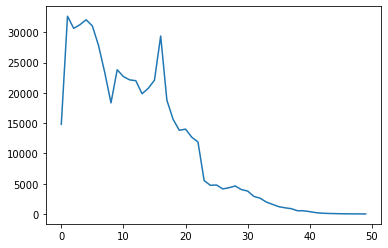

In [63]:
plt.plot(df_plt.xs("long")["annualized_return"])
plt.show()

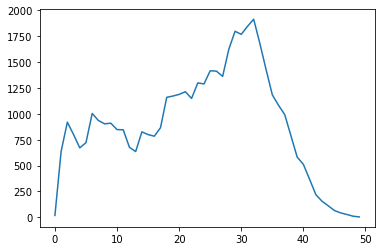

In [64]:
plt.plot(df_plt.xs("short")["annualized_return"])
plt.show()

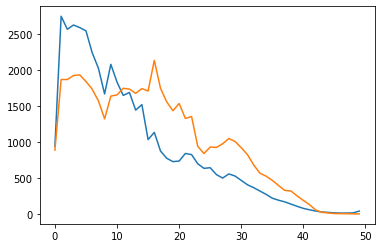

In [54]:
plt.plot(df_plt.xs("long")["sharpe_ratio"])
plt.plot(df_plt.xs("long")["sortino_ratio"])
plt.show()

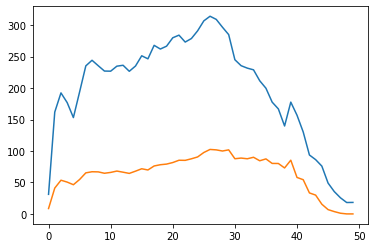

In [55]:
plt.plot(df_plt.xs("short")["sharpe_ratio"])
plt.plot(df_plt.xs("short")["sortino_ratio"])
plt.show()

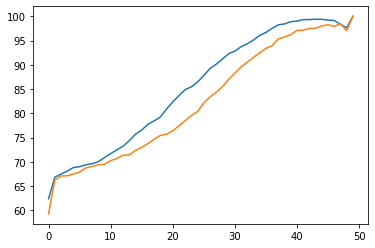

In [56]:
plt.plot(df_plt.xs("long")["win_rate"])
plt.plot(df_plt.xs("short")["win_rate"])
plt.show()

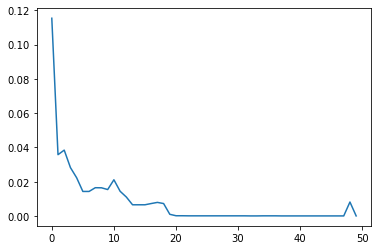

In [58]:
plt.plot(df_plt.xs("long")["maximum_drawdown"])
plt.show()

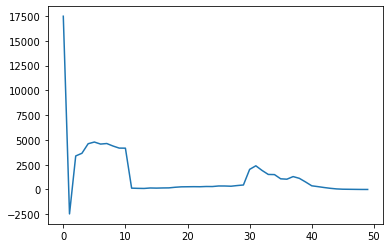

In [59]:
plt.plot(df_plt.xs("short")["maximum_drawdown"])
plt.show()

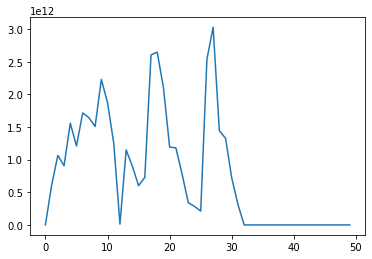

In [61]:
plt.plot(df_plt.xs("long")["calmar_ratio"])
plt.show()

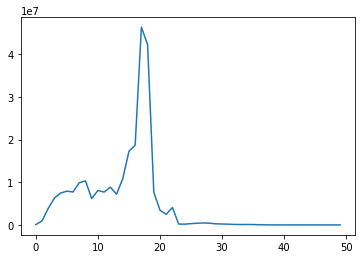

In [62]:
plt.plot(df_plt.xs("short")["calmar_ratio"])
plt.show()